In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse, mse

from sklearn.model_selection import train_test_split
import random

In [2]:
x_1 = np.random.normal(loc=5, scale=7, size=1000)

(array([ 16.,  41.,  96., 201., 246., 211., 132.,  42.,  11.,   4.]),
 array([-14.69619077, -10.3840988 ,  -6.07200683,  -1.75991486,
          2.55217711,   6.86426908,  11.17636105,  15.48845302,
         19.80054499,  24.11263696,  28.42472893]),
 <a list of 10 Patch objects>)

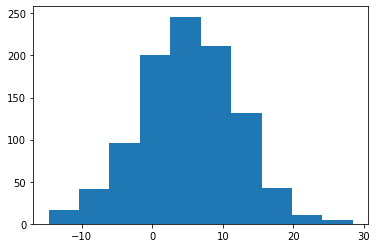

In [3]:
# normally distributed with mean 5 and standard deviation 7
plt.hist(x_1)

In [4]:
true_error = np.random.normal(loc=0, scale=2, size=1000)
true_beta_0 = 1.1
true_beta_1 = -8.2

In [5]:
y = true_beta_0 + true_beta_1*x_1 + true_error

(array([  4.,  11.,  40., 136., 204., 252., 199.,  97.,  43.,  14.]),
 array([-233.16897238, -197.60977719, -162.050582  , -126.49138681,
         -90.93219163,  -55.37299644,  -19.81380125,   15.74539394,
          51.30458912,   86.86378431,  122.4229795 ]),
 <a list of 10 Patch objects>)

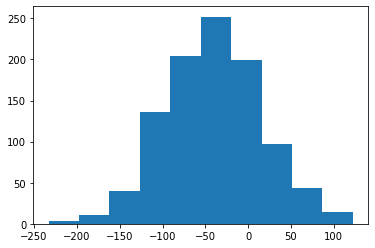

In [6]:
plt.hist(y)

Text(0, 0.5, 'y')

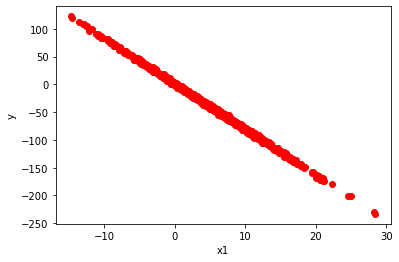

In [7]:
plt.scatter(x_1, y, color='red')
plt.xlabel("x1")
plt.ylabel("y")

In [8]:
# fit linear regression

X = sm.add_constant(x_1) # adding a constant
model = sm.OLS(y, X).fit()

In [9]:
#true_beta_0 = 1.1
#true_beta_1 = -8.2
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 8.497e+05
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        15:48:12   Log-Likelihood:                -2071.8
No. Observations:                1000   AIC:                             4148.
Df Residuals:                     998   BIC:                             4158.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9585      0.075     12.724      0.000       0.811       1.106
x1            -8.1773      0.009   -921.790      0.000      -8.195      -8.160
==============================================================================
Omnibus:                        0.734   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.693   Jarque-Bera (JB):                0.813
Skew:                          -0.055   Prob(JB):                        0.666
Kurtosis:                       2.914   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
shape, scale = 2., 2.
x_2 = np.random.gamma(shape, scale, size=1000)
true_beta_2 = 15.5
y = true_beta_0 + true_beta_1*x_1 + + true_beta_2*x_2 + true_error

(array([266., 326., 204., 110.,  58.,  19.,   8.,   5.,   1.,   3.]),
 array([ 0.07671512,  2.04852073,  4.02032635,  5.99213196,  7.96393757,
         9.93574318, 11.90754879, 13.87935441, 15.85116002, 17.82296563,
        19.79477124]),
 <a list of 10 Patch objects>)

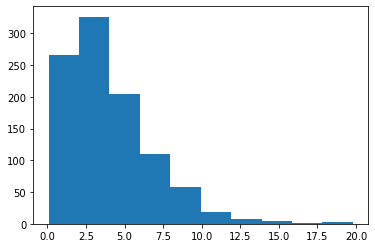

In [11]:
plt.hist(x_2)

Text(0, 0.5, 'y')

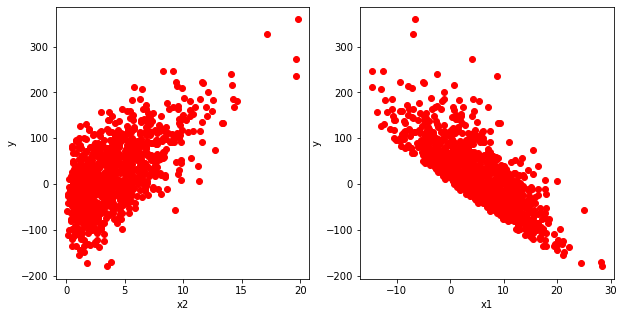

In [12]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].scatter(x_2, y, color='red')
axes[0].set_xlabel("x2")
axes[0].set_ylabel("y")

axes[1].scatter(x_1, y, color='red')
axes[1].set_xlabel("x1")
axes[1].set_ylabel("y")

In [20]:
df = pd.DataFrame({'x1':x_1,'x2':x_2,'y':y})

In [21]:
model = ols("y ~ x1", data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     1665.
Date:                Wed, 16 Dec 2020   Prob (F-statistic):          6.68e-215
Time:                        15:49:18   Log-Likelihood:                -5214.2
No. Observations:                1000   AIC:                         1.043e+04
Df Residuals:                     998   BIC:                         1.044e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.4706      1.744     36.959      0.000      61.047      67.894
x1            -8.3821      0.205    -40.802      0.000      -8.785      -7.979
==============================================================================
Omnibus:                      278.390   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              765.580
Skew:                           1.418   Prob(JB):                    5.71e-167
Kurtosis:                       6.215   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
model = ols("y ~ x2", data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     678.9
Date:                Wed, 16 Dec 2020   Prob (F-statistic):          1.37e-114
Time:                        15:49:20   Log-Likelihood:                -5445.4
No. Observations:                1000   AIC:                         1.089e+04
Df Residuals:                     998   BIC:                         1.090e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -42.4927      3.060    -13.885      0.000     -48.498     -36.487
x2            16.1138      0.618     26.056      0.000      14.900      17.327
==============================================================================
Omnibus:                        0.303   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.859   Jarque-Bera (JB):                0.289
Skew:                           0.042   Prob(JB):                        0.865
Kurtosis:                       2.998   Cond. No.                         8.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
#true_beta_0 = 1.1
#true_beta_1 = -8.2
#true_beta_2 = 15.5

model = ols("y ~ x1 + x2", data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 7.128e+05
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        15:49:23   Log-Likelihood:                -2071.8
No. Observations:                1000   AIC:                             4150.
Df Residuals:                     997   BIC:                             4164.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9697      0.115      8.429      0.000       0.744       1.195
x1            -8.1774      0.009   -920.881      0.000      -8.195      -8.160
x2            15.4973      0.021    730.525      0.000      15.456      15.539
==============================================================================
Omnibus:                        0.735   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.693   Jarque-Bera (JB):                0.816
Skew:                          -0.054   Prob(JB):                        0.665
Kurtosis:                       2.911   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
x_pred = df[['x1','x2']]
x_pred = sm.add_constant(x_pred)

ypred = results.predict(x_pred)
rmse_ = rmse(y, ypred)
mse_ = mse(y, ypred)

# MSE by sample size

In [54]:
train_props = [random.uniform(0,0.95) for i in range(100)]
train_props = sorted(train_props)

In [55]:
# mse over sample sizes
train_sizes = []
train_mses = []
test_mses = []

for p in train_props:
    X_train, X_test, y_train, y_test = train_test_split(df[['x1','x2']], df['y'],
                                                        test_size=1 - p, random_state=42)
    
    X_train = sm.add_constant(X_train) # adding a constant
    model = sm.OLS(y_train, X_train).fit()
    
    X_test = sm.add_constant(X_test)
    ypred = model.predict(X_test)
    
    test_mse = mse(y_test, ypred)
    train_mse = mse(y_train, model.predict(X_train))
    
    test_mses.append(test_mse)
    train_mses.append(train_mse)
    
    train_sizes.append(len(X_train))


Text(0, 0.5, 'mse')

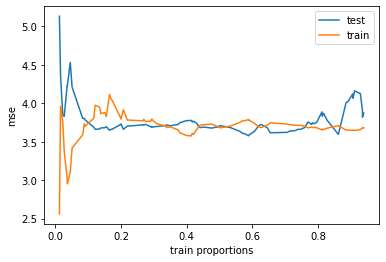

In [62]:
# mse stables out once train proportion is above 10% and below 90%
plt.plot(train_props, test_mses, label='test')
plt.plot(train_props, train_mses, label='train')
plt.legend()
plt.xlabel('train proportions')
plt.ylabel('mse')

# Play around with parameters

In [319]:
# when the betas are close to 0, most of the points are generated by noise
# doesn't seem to matter what the distribution of error. The model is still able to 
# find the linear relationship

"""
quoted from duke.edu about the normality assumption of the error term:

Technically, the normal distribution assumption is not necessary if you are willing to assume 
the model equation is correct and your only goal is to estimate its coefficients and
generate predictions in such a way as to minimize mean squared error.  The formulas
for estimating coefficients require no more than that, and some references on regression
analysis do not list normally distributed errors among the key assumptions.
But generally we are interested in making inferences about the model and/or estimating the
probability that a given forecast error will exceed some threshold in a particular direction,
in which case distributional assumptions are important.  Also, a significant violation of
the normal distribution assumption is often a "red flag" indicating that there is some 
other problem with the model assumptions and/or that there are a few unusual data points 
that should be studied closely and/or that a better model is still waiting out there somewhere.
"""

true_error = np.random.normal(loc=0, scale=2, size=1000)
#true_error = np.random.gamma(2, 50, size=1000)
#true_error = np.random.binomial(10, 0.2, size=1000)
true_beta_0 = 100
true_beta_1 = 10
true_beta_2 = 40

x_1 = np.random.normal(loc=5, scale=7, size=1000)
x_2 = np.random.normal(loc=10, scale=2, size=1000)
y = true_beta_0 + true_beta_1*x_1 + true_beta_2*x_2 + true_error

(array([  1.,   8.,  30., 102., 216., 257., 216., 121.,  43.,   6.]),
 array([-7.82010702, -6.41818551, -5.01626401, -3.6143425 , -2.21242099,
        -0.81049949,  0.59142202,  1.99334353,  3.39526503,  4.79718654,
         6.19910805]),
 <a list of 10 Patch objects>)

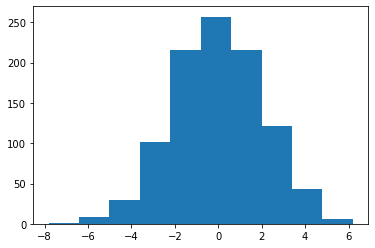

In [320]:
plt.hist(true_error)

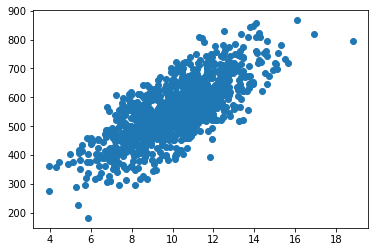

In [321]:
plt.scatter(x_2, y)

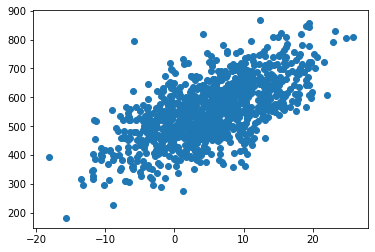

In [322]:
plt.scatter(x_1, y)

In [323]:
df = pd.DataFrame({'x1':x_1,'x2':x_2,'y':y})
model = ols("y ~ x1 + x2", data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.366e+06
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:10:36   Log-Likelihood:                -2127.3
No. Observations:                1000   AIC:                             4261.
Df Residuals:                     997   BIC:                             4275.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    100.3183      0.325    308.886      0.000      99.681     100.956
x1             9.9951      0.009   1095.536      0.000       9.977      10.013
x2            39.9697      0.031   1283.303      0.000      39.909      40.031
==============================================================================
Omnibus:                        0.905   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.636   Jarque-Bera (JB):                0.980
Skew:                          -0.065   Prob(JB):                        0.613
Kurtosis:                       2.918   Cond. No.                         61.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [318]:
model = ols("y ~ x2", data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     893.6
Date:                Wed, 16 Dec 2020   Prob (F-statistic):          9.72e-141
Time:                        17:08:45   Log-Likelihood:                -5979.3
No. Observations:                1000   AIC:                         1.196e+04
Df Residuals:                     998   BIC:                         1.197e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    215.7054     14.867     14.509      0.000     186.530     244.880
x2            43.4299      1.453     29.894      0.000      40.579      46.281
==============================================================================
Omnibus:                       33.830   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.185
Skew:                           0.427   Prob(JB):                     8.42e-09
Kurtosis:                       3.404   Cond. No.                         50.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [293]:
# even tho x_1 and x_2 are independent, if they have similar distribution and 
# their true_beta are of the same magnitude then
# the r2 for just x_2 is much smaller since x_1 already explains
# most of those variance

# changing x2 to be a completely diff distribution like gamma gives x2 a much higher r2
true_error = np.random.normal(loc=0, scale=2, size=1000)

x_1 = np.random.normal(loc=5, scale=7, size=1000)
#x_2 = np.random.normal(loc=10, scale=2, size=1000)
x_2 = np.random.gamma(4, 4, size=1000)
x_3 = np.random.binomial(n=30, p=0.5, size=1000)

In [238]:
true_beta_0 = 5
true_beta_1 = 100
true_beta_2 = -100
true_beta_3 = 250

y = true_beta_0 + true_beta_1*x_1 + true_beta_2*x_2 + true_beta_3*x_3 + true_error

(array([ 62., 196., 263., 222., 119.,  64.,  39.,  23.,  10.,   2.]),
 array([ 0.92005978,  5.70930757, 10.49855536, 15.28780316, 20.07705095,
        24.86629874, 29.65554653, 34.44479432, 39.23404212, 44.02328991,
        48.8125377 ]),
 <a list of 10 Patch objects>)

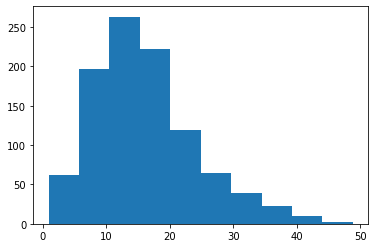

In [239]:
plt.hist(x_2)

In [240]:
df = pd.DataFrame({'x1':x_1,'x2':x_2,'x3':x_3,'y':y})
model = ols("y ~ x1 + x2 + x3", data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.381e+08
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:43:35   Log-Likelihood:                -2108.0
No. Observations:                1000   AIC:                             4224.
Df Residuals:                     996   BIC:                             4244.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8343      0.386     12.509      0.000       4.076       5.593
x1           100.0083      0.009   1.14e+04      0.000      99.991     100.026
x2          -100.0038      0.008  -1.28e+04      0.000    -100.019     -99.988
x3           250.0176      0.024   1.06e+04      0.000     249.971     250.064
==============================================================================
Omnibus:                        2.306   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.316   Jarque-Bera (JB):                2.162
Skew:                           0.099   Prob(JB):                        0.339
Kurtosis:                       3.112   Cond. No.                         144.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [243]:
model = ols("y ~ x3", data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     401.8
Date:                Wed, 16 Dec 2020   Prob (F-statistic):           2.28e-75
Time:                        16:43:43   Log-Likelihood:                -8408.1
No. Observations:                1000   AIC:                         1.682e+04
Df Residuals:                     998   BIC:                         1.683e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1238.1806    196.940     -6.287      0.000   -1624.645    -851.717
x3           257.6221     12.853     20.044      0.000     232.400     282.844
==============================================================================
Omnibus:                       15.743   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.049
Skew:                          -0.304   Prob(JB):                     0.000327
Kurtosis:                       3.120   Cond. No.                         88.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

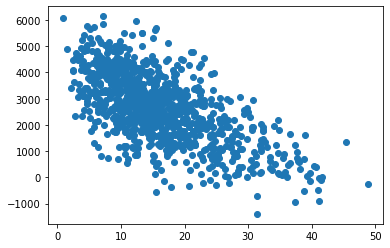

In [244]:
plt.scatter(x_2, y)

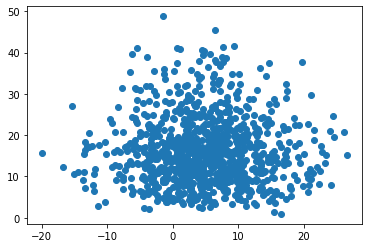

In [245]:
plt.scatter(x_1, x_2)